## Введение

Описание проекта


Нам нужно построить модель для определения стоимости. 
    
    Признаки
DateCrawled — дата скачивания анкеты из базы

VehicleType — тип автомобильного кузова

RegistrationYear — год регистрации автомобиля

Gearbox — тип коробки передач

Power — мощность (л. с.)

Model — модель автомобиля

Kilometer — пробег (км)

RegistrationMonth — месяц регистрации автомобиля

FuelType — тип топлива

Brand — марка автомобиля

NotRepaired — была машина в ремонте или нет

DateCreated — дата создания анкеты

NumberOfPictures — количество фотографий автомобиля

PostalCode — почтовый индекс владельца анкеты (пользователя)

LastSeen — дата последней активности пользователя


    Целевой признак

Price — цена (евро)

### 1. Знакомство с данными


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

In [94]:
df = pd.read_csv('/datasets/autos.csv')
df.head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [96]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

В данных есть категориальные и численные признаки.Много пропусков. Нужно детально их рассмотреть и пропработать прежде, чем работать с моделями обучения. 

In [97]:
df[['VehicleType','Gearbox','Model','FuelType','Repaired']] = df[['VehicleType','Gearbox','Model','FuelType','Repaired']].fillna('no_info')



Пока я заполню все пропуски одним и тем же "ключем". Во времея более детального рассмотрения данных он вылезет и мы сможем определеить роль этих пропусков.

#### Уберем неинформативные признаки


Неинформативными считаем следующие признаки:
    
    DateCrawled — дата скачивания анкеты из базы
    RegistrationMonth — месяц регистрации автомобиля
    DateCreated — дата создания анкеты
    PostalCode — почтовый индекс владельца анкеты (пользователя)
    LastSeen — дата последней активности пользователя
    

In [98]:
# уберем их
df = df.drop(['RegistrationMonth','DateCrawled', 'DateCreated', 'LastSeen', 'PostalCode'], axis=1)
df.shape

(354369, 11)

In [99]:
print(df.columns)

Index(['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model',
       'Kilometer', 'FuelType', 'Brand', 'Repaired', 'NumberOfPictures'],
      dtype='object')


#### Рассмотрим данные в пределах каждого признака

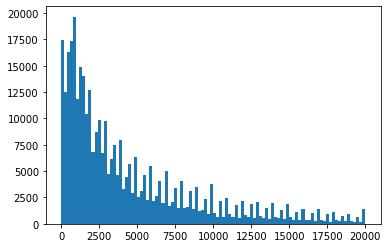

In [100]:
plt.hist(df['Price'], bins=100)
plt.show()

In [101]:
tab = df.loc[df['Price']==0]
tab.head(5)


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired,NumberOfPictures
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no,0
40,0,no_info,1990,no_info,0,corsa,150000,petrol,opel,no_info,0
111,0,no_info,2017,manual,0,golf,5000,petrol,volkswagen,no_info,0
115,0,small,1999,no_info,0,no_info,5000,petrol,volkswagen,no_info,0
152,0,bus,2004,manual,101,meriva,150000,lpg,opel,yes,0


Мы видим, что есть ряд предложений, где стоимость автомобиля равна нулю. От таких данных мы избавимся. В дальнейшем мы будем последовательно убирать из данных неадекватные значения.

In [102]:
df = df.loc[df['Price'] > 300]
df.shape

(328475, 11)

<AxesSubplot:>

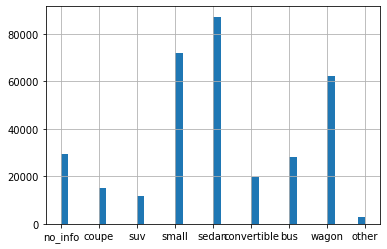

In [103]:
df['VehicleType'].hist(bins=40)


C типами кузова все в порядке

<AxesSubplot:>

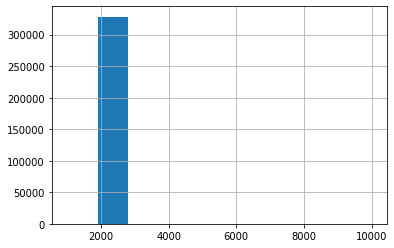

In [104]:
df['RegistrationYear'].hist()

In [105]:
df=df.loc[(df['RegistrationYear']<=2023) & (df['RegistrationYear']>=1990)]

<AxesSubplot:>

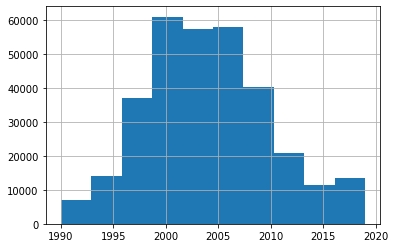

In [106]:
df['RegistrationYear'].hist()

Убрали выпадающие года выпуска.

<AxesSubplot:>

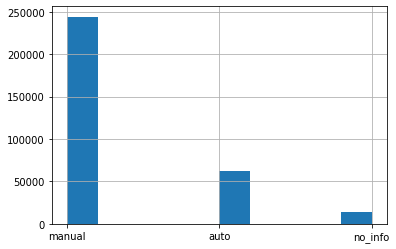

In [107]:
df['Gearbox'].hist()

<AxesSubplot:>

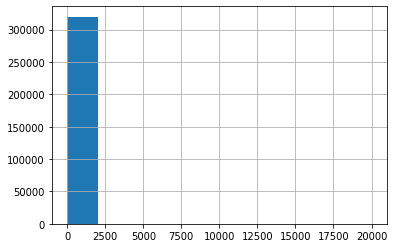

In [108]:
df['Power'].hist()

In [109]:
df = df.loc[(df['Power'] < 600) & (df['Power'] > 30)]

<AxesSubplot:>

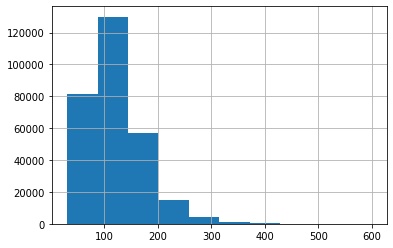

In [110]:
df['Power'].hist()

Убрали очень большие и очень маленькие значения мощности.

<AxesSubplot:>

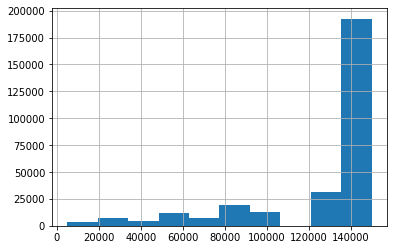

In [111]:
df['Kilometer'].hist()

Данные по пробегу в порядке.

<AxesSubplot:>

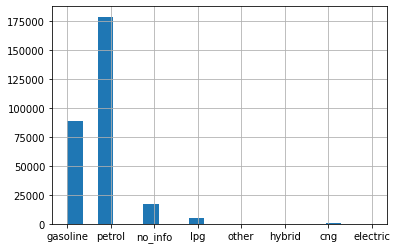

In [112]:
df['FuelType'].hist(bins=20)

In [113]:
df['FuelType'].value_counts()

petrol      178595
gasoline     88319
no_info      17415
lpg           4677
cng            486
hybrid         204
other           50
electric        36
Name: FuelType, dtype: int64

С данными по типу топлива все в порядке.

<AxesSubplot:>

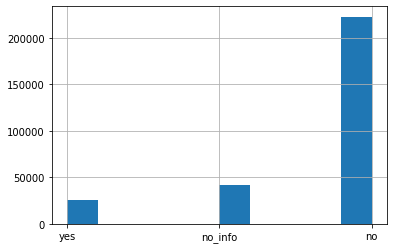

In [114]:
df['Repaired'].hist()

С данными о ремонте все в порядке.

<AxesSubplot:>

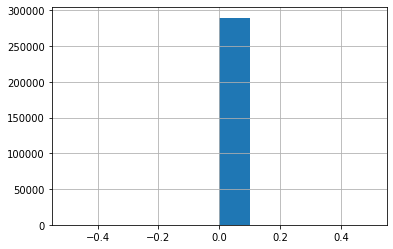

In [115]:
df['NumberOfPictures'].hist()

In [116]:
df['NumberOfPictures'].value_counts()

0    289782
Name: NumberOfPictures, dtype: int64

In [117]:
# в столбце с количеством фото везде нули. Удалим его.
df = df.drop(['NumberOfPictures'], axis=1)
df

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
1,18300,coupe,2011,manual,190,no_info,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,no_info
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
...,...,...,...,...,...,...,...,...,...,...
354361,5250,no_info,2016,auto,150,159,150000,no_info,alfa_romeo,no
354362,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


### Вывод: 

    Мы внимательно рассмотрели каждый столбец наших данных и скорректировали их следующими способами:
        1.Удалили неинформативные признаки
        2.Удалили предложения за ноль евро
        3.Удалили предложения с неадекватными годами выпуска
        4.Удалили предложения с неадекватными мощностями

###  Построение моделей

##### Сначала подготовим данные для нелинейных моделей, для этого используем порядковое кодирование.

In [118]:
from sklearn.preprocessing import OrdinalEncoder

In [119]:
# Сформируем признаки и целевой показатель
features_ord = df.drop(['Price'], axis=1)
target_ord = df['Price']

In [120]:
# Формируем обучающую, валидационную и тестовую выборки
# Проверяем их по форме

features_train_ord, features_valid_ord, target_train_ord, target_valid_ord = train_test_split(features_ord, target_ord, test_size = 0.4, random_state=42)

features_valid_ord, features_test_ord, target_valid_ord, target_test_ord = train_test_split(features_valid_ord, target_valid_ord, test_size = 0.5, random_state=42)

print(features_train_ord.shape)
print(target_train_ord.shape)
print()
print(features_valid_ord.shape)
print(target_valid_ord.shape)
print()
print(features_test_ord.shape)
print(target_test_ord.shape)

(173869, 9)
(173869,)

(57956, 9)
(57956,)

(57957, 9)
(57957,)


In [121]:
# Укажем категориальные признаки для кодирования
cat_features = features_ord.drop(['RegistrationYear', 'Kilometer', 'Power'], axis=1).columns
cat_features = list(cat_features)
cat_features



['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

In [122]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    
features_train_ord.loc[:, cat_features] = encoder.fit_transform(features_train_ord.loc[:, cat_features])
features_valid_ord.loc[:, cat_features] = encoder.fit_transform(features_valid_ord.loc[:, cat_features])
features_test_ord.loc[:, cat_features] = encoder.fit_transform(features_test_ord.loc[:, cat_features])

features_test_ord.head()


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
336127,8.0,2000,0.0,144,162.0,150000,7.0,24.0,0.0
144396,8.0,2002,0.0,163,14.0,150000,2.0,2.0,0.0
169519,5.0,2004,1.0,140,187.0,150000,7.0,39.0,0.0
83417,3.0,2016,1.0,75,164.0,150000,5.0,19.0,1.0
194187,1.0,2008,1.0,120,7.0,70000,7.0,25.0,0.0


In [123]:
# features_train_ord = encoder.transform(features_train_ord)
# features_train_ord = pd.DataFrame(encoder.transform(features_train_ord), columns = features_train_ord.columns)

# features_train_ord.head()


##### Подготовка данных для построения линейных моделей

In [124]:
# Переведем категориальные переменные в количественный с помощью дамми-переменных

сategorical_col_updated = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

df = pd.get_dummies(df, columns = сategorical_col_updated,  drop_first=True)

In [125]:
df = df.reset_index()

In [126]:
# формируем таблицы признаков и цевого показателя

features = df.drop(['Price'], axis=1)
target = df['Price']

In [127]:
# Формируем обучающую и валидационную выборки
# Проверяем их по форме

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.4, random_state=42)

features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size = 0.5, random_state=42)

print(features_train.shape)
print(target_train.shape)
print()
print(features_valid.shape)
print(target_valid.shape)
print()
print(features_test.shape)
print(target_test.shape)

(173869, 310)
(173869,)

(57956, 310)
(57956,)

(57957, 310)
(57957,)


####  Линейная регрессия

In [128]:
# Для улучшения качества модели также используем кросс-валидацию

In [129]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [130]:
%%time
model_4 = LinearRegression()

RMSE_4 = cross_val_score(model_4, features, target, cv=3, scoring='neg_root_mean_squared_error').mean()
print(-RMSE_4)

2308.690539205458
CPU times: user 1min 5s, sys: 2min, total: 3min 6s
Wall time: 3min 6s


In [131]:
%%time
linear_model = LinearRegression()
linear_model.fit(features_train, target_train)



CPU times: user 18.9 s, sys: 41.5 s, total: 1min
Wall time: 1min


LinearRegression()

In [132]:
%%time
linear_preds = linear_model.predict(features_valid)
print(mean_squared_error(target_valid, linear_preds)**0.5)

2306.446074273682
CPU times: user 84 ms, sys: 149 ms, total: 233 ms
Wall time: 223 ms


In [133]:
print('Оценка качетсва модели линейной регресссии с использованием кросс-валидации:',-RMSE_4)
print('Время обучения линейной регрессии на кросс-валидации: 41 секунда')
print('Время предсказания линейной регрессии на кросс-валидации: 0.2 секунды')

Оценка качетсва модели линейной регресссии с использованием кросс-валидации: 2308.690539205458
Время обучения линейной регрессии на кросс-валидации: 41 секунда
Время предсказания линейной регрессии на кросс-валидации: 0.2 секунды


#### Выводы:
    Результат работы модели попадает у словия ТЗ. Время обучения в абсолютных единицах незначительное.

#### 3.2 Случайный лес:


In [134]:
# Для кросс валидации объединим обучающую и валидационную выборки:

features_final = pd.concat([features_train_ord, features_valid_ord])
target_final = pd.concat([target_train_ord, target_valid_ord])

In [135]:
%%time
model_5 = RandomForestRegressor(random_state=1)

params = {'max_depth' : [4,6,8],
          'n_estimators' : range(10,15,5)}

grid_CV_3 = GridSearchCV(estimator=model_5, 
                         param_grid=params, 
                         scoring = 'neg_root_mean_squared_error',
                         cv=3,
                         n_jobs=-1,
                         return_train_score=True)

grid_CV_3.fit(features_final, target_final)


CPU times: user 16.8 s, sys: 0 ns, total: 16.8 s
Wall time: 17 s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'n_estimators': range(10, 15, 5)},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [136]:
results =  pd.DataFrame(grid_CV_3.cv_results_)
results[['mean_fit_time', 'mean_score_time']]

,mean_fit_time,mean_score_time
0,1.044481,0.035278
1,1.421505,0.044244
2,1.812524,0.065237


In [137]:
%time
best_params = grid_CV_3.best_params_
print(best_params)
print()
best_score = grid_CV_3.best_score_
print('Оценка лучшей модели случайного леса на кросс-валидации', -(best_score))
print('Время обучения случайного леса на кросс-валидации:', results['mean_fit_time'].sum())
print('Скорость прелсказания случайного леса на кросс-валидации:', results['mean_score_time'].sum())

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
{'max_depth': 8, 'n_estimators': 10}

Оценка лучшей модели случайного леса на кросс-валидации 1975.175318639224
Время обучения случайного леса на кросс-валидации: 4.278510649998983
Скорость прелсказания случайного леса на кросс-валидации: 0.14475949605305988


#### Выводы:
    Случайный лес на кросс-валидации показал хорошее время и очень высокую точность.

####  Градиентный бустинг:

In [138]:
import lightgbm as lgb

In [139]:
# Сформируем обучающую и тестовую выборки

lgb_train = lgb.Dataset(features_train, target_train)
lgb_eval = lgb.Dataset(features_valid, target_valid, reference=lgb_train)

In [140]:

params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # Установить тип продвижения
    'objective': 'regression', # Целевая функция
    'metric': {'l2', 'rmse'},  # Функция оценки
    'num_leaves': 31,   # Количество листовых узлов
    'learning_rate': 0.05,  # Скорость обучения
    'feature_fraction': 0.9, # Построить коэффициент выбора функций
    'bagging_fraction': 0.8, # Построить коэффициент выборки
    'bagging_freq': 5,  # k означает, что упаковка выполняется каждые k итераций
    'verbose': 1 # <0 показывает фатальный, = 0 показывает ошибку (предупреждение),> 0 показывает информацию
}

In [141]:
%%time 

gbm_new = lgb.train(params,lgb_train,num_boost_round=35,valid_sets=lgb_eval,early_stopping_rounds=5)


/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.384204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1096
[LightGBM] [Info] Number of data points in the train set: 173869, number of used features: 288
[LightGBM] [Info] Start training from score 4944.648178
[1]	valid_0's rmse: 4414.92	valid_0's l2: 1.94915e+07
Training until validation scores don't improve for 5 rounds
[2]	valid_0's rmse: 4277.76	valid_0's l2: 1.82993e+07
[3]	valid_0's rmse: 4127.61	valid_0's l2: 1.70372e+07
[4]	valid_0's rmse: 3986.4	valid_0's l2: 1.58914e+07
[5]	valid_0's rmse: 3854.67	valid_0's l2: 1.48585e+07
[6]	valid_0's rmse: 3730.91	valid_0's l2: 1.39197e+07
[7]	valid_0's rmse: 3614.97	valid_0's l2: 1.3068e+07
[8]	valid_0's rmse: 3506.2	valid_0's l2: 1.22934e+07
[9]	valid_0's rmse: 3403.01	valid_0's l2: 1.15805e+07
[10]	valid_0's rmse: 3307.76	valid_0's l2: 

In [146]:


%%time
preds = gbm_new.predict(features_valid, num_iteration=gbm_new.best_iteration)

CPU times: user 437 ms, sys: 0 ns, total: 437 ms
Wall time: 417 ms


In [147]:
# Модель оценки
print('RMSE модели градиентного бустинга:', mean_squared_error(target_valid, preds) ** 0.5)
print('Время обучения LightGBM: 6 минут 3 секунды')
print('Скорость прелсказанияLightGBM: 0.4 секунды')

RMSE модели градиентного бустинга: 2124.795025433288
Время обучения LightGBM: 6 минут 3 секунды
Скорость прелсказанияLightGBM: 0.4 секунды


#### Выводы: 
    
    Мы получили точность выше, чем указана в ТЗ. При этом время обучения зависит от количества итераций, то есть: чем точнее мы хотим получить результат, тем болеше времени на это потреббуется.
    
    Из трех моделей:
        лучшая точность - случайный лес
        лучшая скорость обучения - случайный лес
        лучшая скорость предсказания - градиентный бустинг
        
        
     Для проверки на тестовой выборке выбираем случайный лес, так как точночть там сильно выше, а различия во времени незначительны в абсолютном выражении.

### Тестирование:


Для теста берем модель, которая показала лучшие результаты на валидационной выорке: случайный лес на кросс-валидации.

In [148]:
%%time
final_model = RandomForestRegressor(max_depth=8, n_estimators=10, random_state = 42)
final_model.fit(features_train_ord, target_train_ord)



CPU times: user 2.07 s, sys: 0 ns, total: 2.07 s
Wall time: 2.09 s


RandomForestRegressor(max_depth=8, n_estimators=10, random_state=42)

In [149]:
%%time
predictions = final_model.predict(features_test_ord)
print('RMSE модели на тестовой выборке:', mean_squared_error(target_test_ord, predictions) ** 0.5)
print('Время обучения на тестовой выборке: 2 секунды')
print('Скорость прелсказанияLightGBM: 0.5 секунды')
print()

RMSE модели на тестовой выборке: 2014.8505834317734
Время обучения на тестовой выборке: 2 секунды
Скорость прелсказанияLightGBM: 0.5 секунды

CPU times: user 46.7 ms, sys: 0 ns, total: 46.7 ms
Wall time: 45.5 ms


### Выводы:
     На этапе анализа данных мы внимательно рассмотрели каждый столбец и скорректировали их следующими способами:
        1.Удалили неинформативные признаки
        2.Удалили предложения за ноль евро
        3.Удалили предложения с неадекватными годами выпуска
        4.Удалили предложения с неадекватными мощностями
        
      Работу разных моделей предсказания нам обеспечило кодирование признаков под каждый случай (ОНЕ и ordinal encoder)
      Показатели качества модели на тестовой выборке оказались выше требуемых. Это стало возможным благодаря перебору 
      гиперпараметров для каждой модели и обучению на кросс-валидации.